In [1]:
#pip install pyforest

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


In [1]:
import pyforest
import warnings
warnings.filterwarnings('ignore') # Uyarıların gösterilmesini engelliyor. 

In [2]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1') # UTF hatası durumunda encoding='latin-1' ile sorunu giderebliriz.

<IPython.core.display.Javascript object>

In [3]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

<IPython.core.display.Javascript object>

## EDA

In [4]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [7]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [8]:
data = pd.concat([df_male,df_female], axis=0,ignore_index=True)

<IPython.core.display.Javascript object>

In [9]:
data.shape
# ???

(6068, 109)

In [10]:
data

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,285,1392,335,223,1297,252,196,368,299,...,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.0
6064,NaN,262,1324,301,202,1204,236,181,378,294,...,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.0
6065,NaN,260,1334,318,213,1259,234,183,363,332,...,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.0
6066,NaN,205,1293,302,199,1207,213,163,376,276,...,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [12]:
data.isnull().sum().any()

True

In [13]:
drop_list =[]
for col in data.columns:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [14]:
data.drop(drop_list,axis=1, inplace=True)

In [15]:
data.isnull().sum().any()

False

In [16]:
data.shape

(6068, 106)

In [17]:
data.select_dtypes(exclude=[np.number])

<IPython.core.display.Javascript object>

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand
...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Right hand


In [18]:
for col in data.select_dtypes(exclude=[np.number]).columns:
  print(f"{col} has {data[col].nunique()} unique value")
    

<IPython.core.display.Javascript object>

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [19]:
data.Component.value_counts()

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64

In [20]:
data.groupby("Component")["Branch"].value_counts()

Component            Branch                
Army National Guard  Combat Service Support    1425
                     Combat Arms                807
                     Combat Support             476
Army Reserve         Combat Service Support     146
                     Combat Support              68
                     Combat Arms                  6
Regular Army         Combat Service Support    1603
                     Combat Arms                769
                     Combat Support             768
Name: Branch, dtype: int64

In [21]:
drop_list1 = ["Date", "Installation", "Component","PrimaryMOS"]

data.drop(drop_list1,axis=1,inplace=True)

In [22]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'wristheight', 'Gender', 'Branch', 'SubjectsBirthLocation',
       'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=102)

In [23]:
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
62          8
64          8
63          7
42          7
231         6
43          5
235         4
218         3
651         2
423         2
451         2
431         2
318         2
2351        2
641         2
2518        2
631         1
238         1
358         1
425         1
4251        1
428         1
48          1
42351       1
Name: SubjectNumericRace, dtype: int64

In [24]:
data.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [25]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

In [26]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'wristcircumference', 'wristheight', 'Gender', 'Branch',
       'SubjectsBirthLocation', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=101)

In [27]:
data.DODRace.astype("str")

0       1
1       1
2       2
3       1
4       2
       ..
6063    3
6064    3
6065    2
6066    3
6067    3
Name: DODRace, Length: 6068, dtype: object

In [28]:
data.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic", 4 : "Asian", 5 : "Native American", 6 : "Pacific Islander", 8 : "Other"})
data["DODRace"] = data.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic", 4 : "Asian", 5 : "Native American", 6 : "Pacific Islander", 8 : "Other"})

In [29]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 101 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(96), object(5)
memory usage: 4.7+ MB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.0,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.0,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.0,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.0,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.0,1302.0,1349.00,1553.0
...,...,...,...,...,...,...,...,...
wristcircumference,6068.0,169.002966,13.124513,124.0,159.0,170.0,179.00,216.0
wristheight,6068.0,830.059987,47.650519,672.0,797.0,830.0,863.00,1009.0
Age,6068.0,29.761206,8.674650,17.0,23.0,28.0,36.00,58.0
Heightin,6068.0,68.257251,3.861954,56.0,66.0,68.0,71.00,94.0


In [33]:
for col in data.select_dtypes(include=[np.number]).columns:
    if data[col].min() == 0:
        print(col)


<IPython.core.display.Javascript object>

Weightlbs


In [34]:
data["Weightlbs"].argmin()

866

In [35]:
data.drop(index = data["Weightlbs"].argmin(), inplace=True)

In [36]:
data.reset_index(drop=True, inplace=True)

<AxesSubplot:>

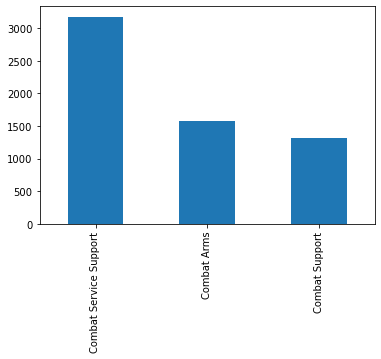

In [37]:
data.Branch.value_counts().plot(kind = "bar")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

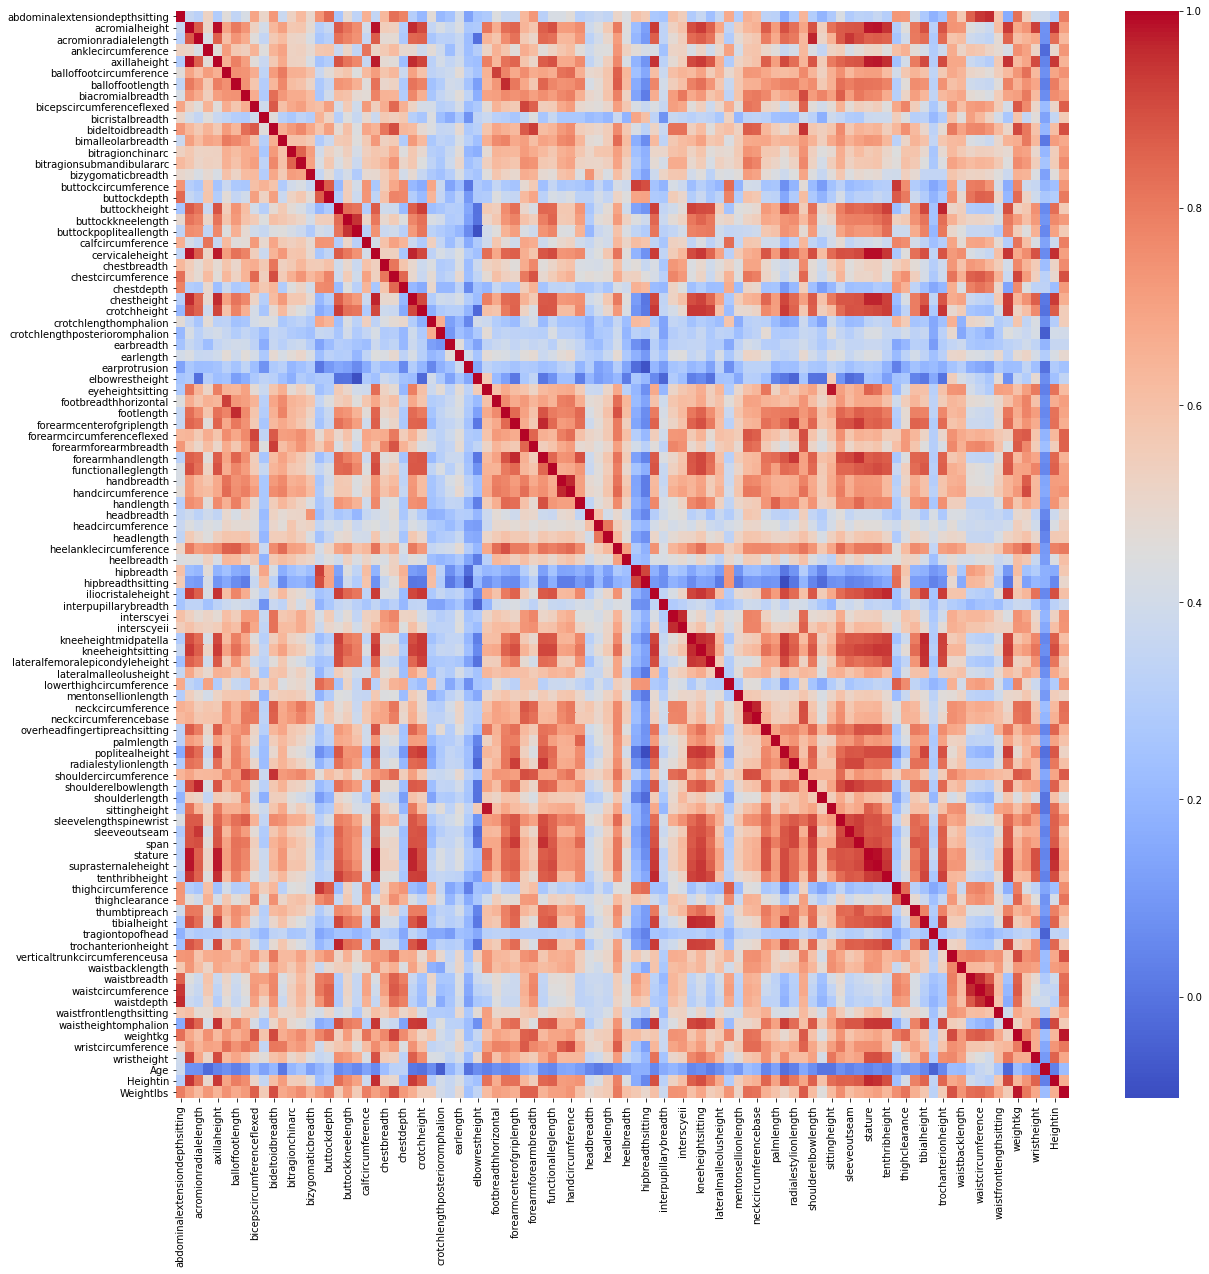

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm")

In [39]:
data.corr() > .9

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
acromialheight,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
acromionradialelength,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
anklecircumference,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
axillaheight,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
wristheight,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
Heightin,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [45]:
df_temp = data.corr()

In [46]:
count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("number of strong corelated features:", count)
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col.value_counts("feature")

number of strong corelated features: done


<IPython.core.display.Javascript object>

feature
kneeheightsitting        19
tenthribheight           17
axillaheight             16
iliocristaleheight       15
waistheightomphalion     15
                         ..
handbreadth               1
neckcircumferencebase     1
neckcircumference         1
Weightlbs                 1
chestcircumference        1
Length: 61, dtype: int64

# DATA Preprocessing

In [47]:
X= data.drop("DODRace",axis=1)
y= data.DODRace

In [48]:
#X= data.iloc[:, -6:]
#X

In [49]:
X = pd.get_dummies(data=X,drop_first=True)

<IPython.core.display.Javascript object>

In [50]:
X

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Vietnam,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
0,266,1467,337,222,1347,253,202,401,369,274,...,0,0,0,0,0,0,0,0,0,1
1,233,1395,326,220,1293,245,193,394,338,257,...,0,0,0,0,0,0,0,0,1,0
2,287,1430,341,230,1327,256,196,427,408,261,...,0,0,0,0,0,0,0,0,1,0
3,234,1347,310,230,1239,262,199,401,359,262,...,0,0,0,0,0,1,0,0,0,1
4,250,1585,372,247,1478,267,224,435,356,263,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,285,1392,335,223,1297,252,196,368,299,312,...,0,0,0,0,0,0,0,0,0,1
6063,262,1324,301,202,1204,236,181,378,294,287,...,0,0,0,0,0,0,0,0,0,1
6064,260,1334,318,213,1259,234,183,363,332,299,...,0,0,0,0,0,0,0,0,0,1
6065,205,1293,302,199,1207,213,163,376,276,280,...,0,0,0,0,0,0,0,0,0,1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

<IPython.core.display.Javascript object>

# Modelling

## RF

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_mod = RandomForestClassifier()

In [54]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = rf_mod.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[  2   6   4   0   0   0  33]
 [  0 207   1   0   0   0  61]
 [  0   7  16   0   0   0  98]
 [  0   1   0   0   0   0   9]
 [  0   0   0   0   0   0   1]
 [  0   1   0   0   0   0  13]
 [  1  13   2   0   0   0 738]]
                  precision    recall  f1-score   support

           Asian       0.67      0.04      0.08        45
           Black       0.88      0.77      0.82       269
        Hispanic       0.70      0.13      0.22       121
 Native American       0.00      0.00      0.00        10
           Other       0.00      0.00      0.00         1
Pacific Islander       0.00      0.00      0.00        14
           White       0.77      0.98      0.86       754

        accuracy                           0.79      1214
       macro avg       0.43      0.27      0.28      1214
    weighted avg       0.77      0.79      0.74      1214



C:\Users\MADCAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MADCAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MADCAT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<AxesSubplot:>

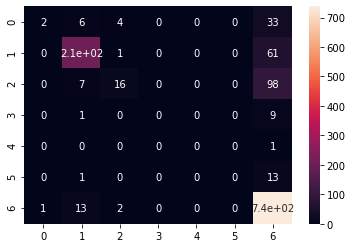

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

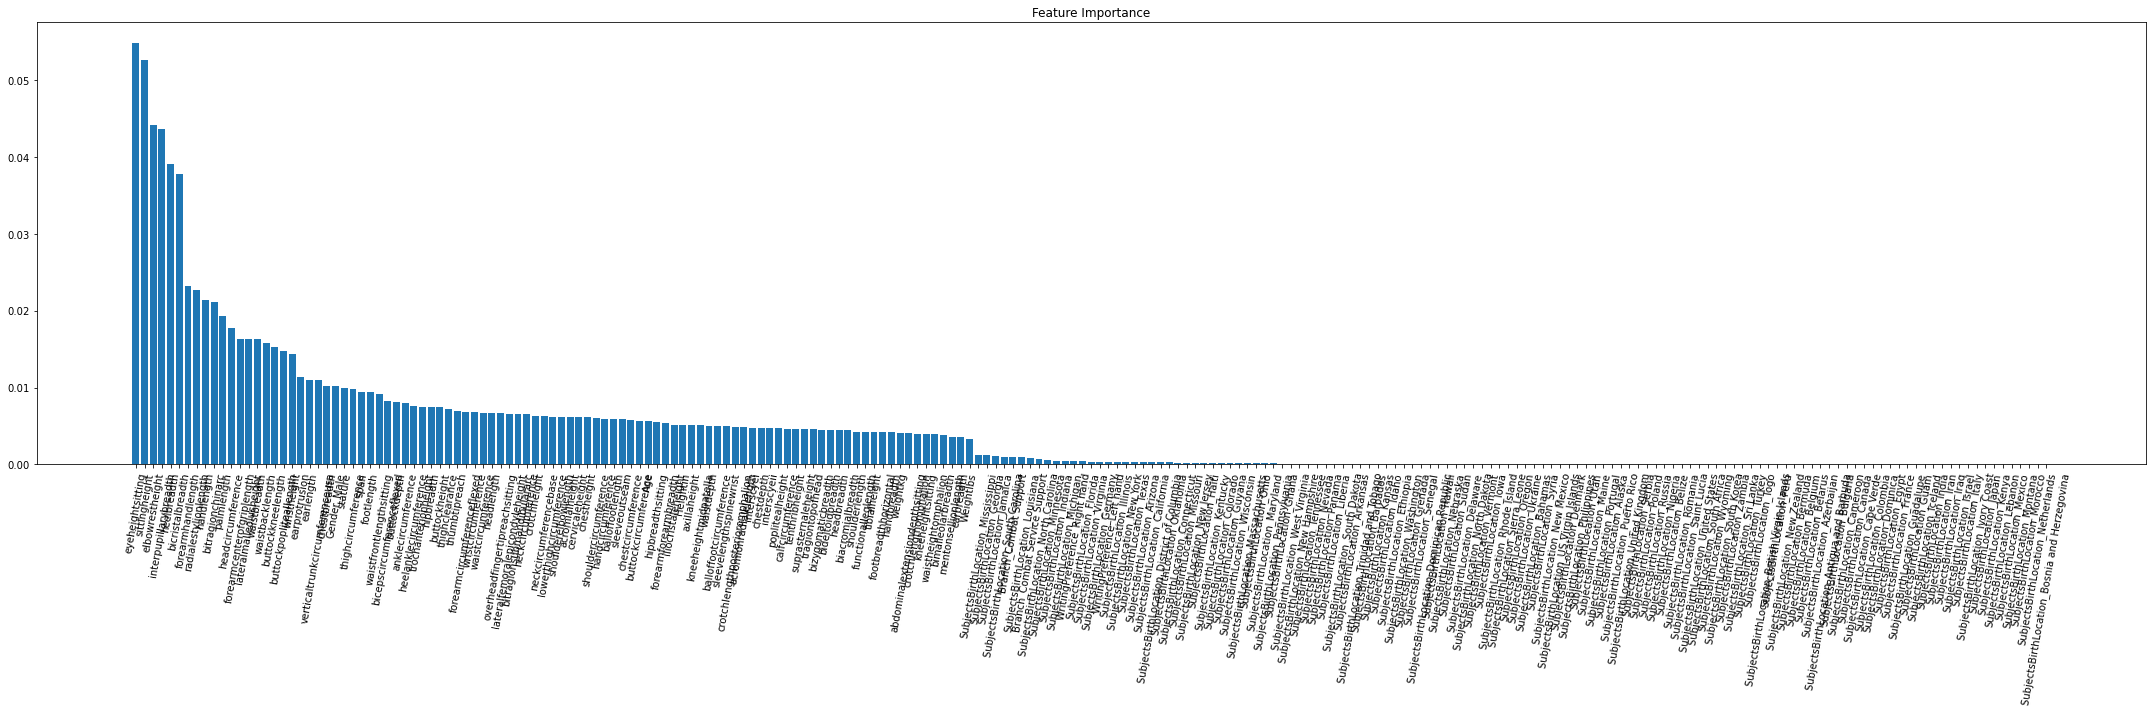

In [103]:
importances = rf_mod.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(30,10))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=80)
plt.tight_layout()
plt.show()

---
---

## Logistic Regression

In [60]:
X= data.drop("DODRace",axis=1)
y= data.DODRace

In [61]:
X = pd.get_dummies(data=X,drop_first=True)

<IPython.core.display.Javascript object>

In [62]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6)

<IPython.core.display.Javascript object>

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression


In [67]:
log_model = LogisticRegression(class_weight='balanced',max_iter=10000)


In [68]:
log_model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', max_iter=10000)

In [69]:
y_pred= log_model.predict(X_test)

In [70]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[ 18   0   1   1   0   4   1]
 [  0 122   4   3   0   0   4]
 [  5   4  37   7   0   0   4]
 [  1   0   1   3   0   0   1]
 [  0   0   0   1   0   0   0]
 [  1   1   0   1   0   4   1]
 [ 10   3  34  52   4   4 270]]
                  precision    recall  f1-score   support

           Asian       0.51      0.72      0.60        25
           Black       0.94      0.92      0.93       133
        Hispanic       0.48      0.65      0.55        57
 Native American       0.04      0.50      0.08         6
           Other       0.00      0.00      0.00         1
Pacific Islander       0.33      0.50      0.40         8
           White       0.96      0.72      0.82       377

        accuracy                           0.75       607
       macro avg       0.47      0.57      0.48       607
    weighted avg       0.87      0.75      0.80       607



<IPython.core.display.Javascript object>

<AxesSubplot:>

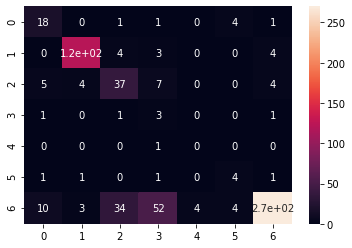

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# Second Iteration

## Feature Engineering

In [72]:
df_BW= data.loc[(data.DODRace == "Black")|(data.DODRace == "White")]

<AxesSubplot:>

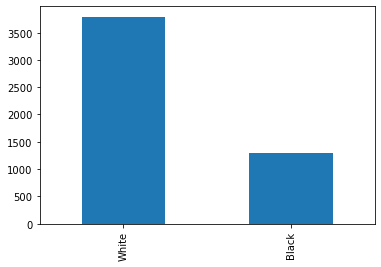

In [73]:
df_BW.DODRace.value_counts().plot.bar()

---
---

## Data Preprocessing

In [74]:
X= df_BW.drop("DODRace",axis=1)
y= df_BW.DODRace

In [75]:
X = pd.get_dummies(data=X,drop_first=True)

<IPython.core.display.Javascript object>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6)

<IPython.core.display.Javascript object>

### Logistic Regression

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
log_model = LogisticRegression(max_iter=10000)#class_weight='balanced'

In [80]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [81]:
y_pred= log_model.predict(X_test)

In [82]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[ 99  14]
 [  5 391]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.91       113
       White       0.97      0.99      0.98       396

    accuracy                           0.96       509
   macro avg       0.96      0.93      0.94       509
weighted avg       0.96      0.96      0.96       509



---
---

## RF

In [83]:
X= df_BW.drop("DODRace",axis=1)
y= df_BW.DODRace

In [84]:
X = pd.get_dummies(data=X,drop_first=True)

<IPython.core.display.Javascript object>

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6)

<IPython.core.display.Javascript object>

In [86]:
rf_mod = RandomForestClassifier()

In [87]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
y_pred = rf_mod.predict(X_test)

In [89]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 83  30]
 [  5 391]]
              precision    recall  f1-score   support

       Black       0.94      0.73      0.83       113
       White       0.93      0.99      0.96       396

    accuracy                           0.93       509
   macro avg       0.94      0.86      0.89       509
weighted avg       0.93      0.93      0.93       509



## RF Tuned

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'n_estimators':[100],
             'criterion': ["gini","entropy"],
             'max_depth':[6,8,10,12,14,16],
             'min_samples_split':[6,8,10,12,14,16]}

In [92]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model, param_grid, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [93]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 6,
 'n_estimators': 100}

In [94]:
y_pred = rf_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 84  29]
 [  4 392]]
              precision    recall  f1-score   support

       Black       0.95      0.74      0.84       113
       White       0.93      0.99      0.96       396

    accuracy                           0.94       509
   macro avg       0.94      0.87      0.90       509
weighted avg       0.94      0.94      0.93       509



In [95]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_grid_model.best_estimator_.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

<IPython.core.display.Javascript object>

,Feature Importance
sittingheight,0.055066
eyeheightsitting,0.050652
heelbreadth,0.045763
interpupillarybreadth,0.043209
bicristalbreadth,0.039227
...,...
SubjectsBirthLocation_Israel,0.000000
SubjectsBirthLocation_Iraq,0.000000
SubjectsBirthLocation_Iran,0.000000
SubjectsBirthLocation_Azerbaijan,0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

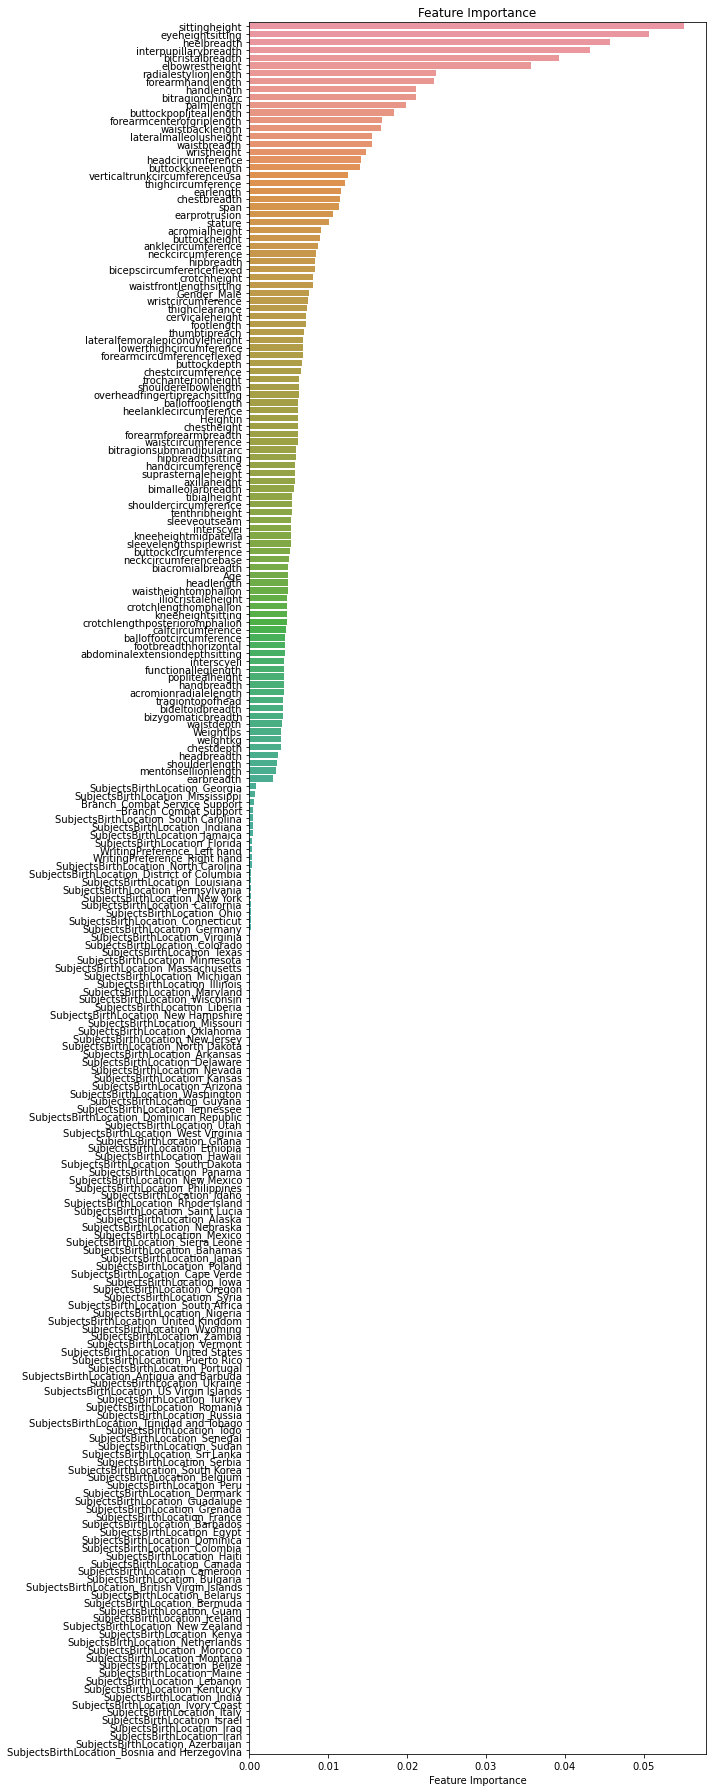

In [96]:
plt.figure(figsize=(10,25))
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

---
---

## XGBoost

In [97]:
from xgboost import XGBClassifier


In [98]:
xgb_model = XGBClassifier()

In [99]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_pred= xgb_model.predict(X_test)

In [101]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[ 98  15]
 [  6 390]]
              precision    recall  f1-score   support

       Black       0.94      0.87      0.90       113
       White       0.96      0.98      0.97       396

    accuracy                           0.96       509
   macro avg       0.95      0.93      0.94       509
weighted avg       0.96      0.96      0.96       509



# Task 

1. Tune XGBoost,
2. Compare,ROC/AUC scores of models.(Binary Models)
3. Build a second model for races other than Black&White evaluate the performance of your choosen model